### Bài 1

Nghiên cứu mức thu nhập ($X$) và chi tiêu ($Y$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

In [55]:
import numpy as np 
import matplotlib.pyplot as plt

In [14]:
# thu nhập 𝑋
x = np.array([130,150,133,170,170,210,230])
# chi tiêu y
y = np.array([84,120,108,130,130,150,160])


In [22]:
np.corrcoef(x, y)


array([[1.        , 0.94705241],
       [0.94705241, 1.        ]])

Ta thấy hệ số tương quan là: __0.9470__ cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

In [15]:
x_mean=x.mean()
y_mean=y.mean()

In [16]:
tu = sum((x - x_mean) * (y - y_mean))
tu

5466.0

In [17]:
mau = sum((x - x_mean) * (x - x_mean))
mau

8567.714285714286

In [18]:
b1 = tu/mau
b1

0.6379764564644679

In [19]:
b0 = y_mean - b1 * x_mean
b0

17.270583919698552

In [20]:
print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)}x")

Mô hình hồi quy: y = 17.2706 + 0.638x


In [21]:
x0=x.min()
y0=b0+x0
x1=x.max()
y1=b0+x1
print(x0, y0)
print(x1, y1)

130 147.27058391969854
230 247.27058391969854


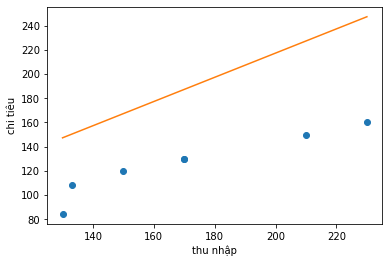

In [12]:
plt.plot(x, y, 'o')
plt.plot([x0, x1], [y0, y1])
plt.xlabel('thu nhập')
plt.ylabel('chi tiêu')
plt.show()

câu b:

In [24]:
import statsmodels.api as sm
import pandas as pd

In [25]:
model = sm.formula.ols('y~x', data=pd.DataFrame({'x': x, 'y':y})).fit()

In [27]:
model.predict(exog=dict(x=200))

0    144.865875
dtype: float64

### Bài 2

Tiến hành nghiên cứu mối quan hệ giữa:

- X: giá bán kẻ của thịt gà (nghìn/kg) 
- Y: lượng thịt gà tiêu thụ (kg/tháng)

Dữ liệu thu được gồm 10 tháng như sau:

| X            | 35       | 40       | 45       | 40       | 38       | 40       | 45       | 30       | 42       | 38       |
| :----------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **2.29** | **2.04** | **0.59** | **2.06** | **2.50** | **2.32** | **1.57** | **3.96** | **1.43** | **2.34** |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính lượng tiêu thụ thịt gà theo giá bán.

b. Dự đoán lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng)

In [29]:
x_2=np.array([35,40,45,40,38,40,45,30,42,38])
y_2=np.array([2.29,2.04,0.59,2.06,2.50,2.32,1.57,3.96,1.43,2.34])


In [30]:
np.corrcoef(x_2, y_2)

array([[ 1.        , -0.91953287],
       [-0.91953287,  1.        ]])

Ta thấy hệ số tương quan là: -__0.91__ cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

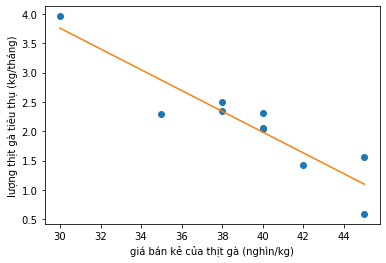

In [51]:
x0_2=x_2.min()
y0_2=b0_2+b1_2*x0_2

x1_2=x_2.max()
y1_2=b0_2+b1_2*x1_2

plt.plot(x_2,y_2, 'o')
plt.plot([x0_2, x1_2],[y0_2, y1_2])

plt.xlabel('giá bán kẻ của thịt gà (nghìn/kg)')
plt.ylabel('lượng thịt gà tiêu thụ (kg/tháng)')
plt.show()

In [43]:
model_2 = sm.formula.ols('y~x', data=pd.DataFrame({'x': x_2, 'y':y_2})).fit()

model_2.predict(exog=dict(x=41))


0    1.808462
dtype: float64

Bài 3:
Cho bộ dữ liệu về bệnh tiểu đường ở file đính kèm. Bộ dữ liệu gồm 768 dòng và 9 cột với
các cột được mô tả chi tiết như sau:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral lucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)
Hãy viết code để thực hiện các yêu cầu sau:

1.1 Đọc dữ liệu

1.2 Trực quan hóa bằng biểu đồ histogram, plotbox

1.3 Dùng lệnh để mô tả thông tin chi tiết về dữ liệu với các thống kê: min, max, std,
25%, 50%, 75%

1.4 Cho biết kích thước dữ liệu, có dữ liệu nào trống không, và mô tả loại dữ liệu của
từng cột

1.5 Cho biết trong dữ liệu có bao nhiêu lượt mang thai và và bệnh tiểu đưởng theo gợi ý
như bảng sau:
Số lượt Có bệnh Không có Tổng
0 4 5 9
1 3 7 10
2 6 5 11

1.6 Lưu kết quả ở câu 1.5 vào 1 file csv đồng thời trực quan hóa kết quả ở câu 1.5 qua
các hình, lưu các hình vào các file khác nhau.

1.7 Phân tích chi tiết độ phân bố của bệnh tiểu đường/không có bệnh tiểu đường theo
độ tuổi?

1.8 Trực quan hóa kết quả ở câu 7?

1.9 Tính mối tương quan giữa số lần mang thai và bệnh tiểu đường theo độ đo Pearson

1.10 Tính mỗi liên quan giữa các đặc trưng khác với bệnh tiểu đường, cho biết đâu là đặc
trưng có ảnh hưởng nhất tới bệnh tiểu đường?

1.11 Dự đoán bệnh tiểu đường với mô hình Linear Regression

In [62]:
read_pd =pd.read_csv("T:/file.csv", header=0)
